In [111]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [112]:
mnist_data = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## basic ops

In [113]:
input_dim = 784
output_dim = 10
w_value = np.random.uniform(size=(input_dim, output_dim)).astype(np.float32)
b_value = np.zeros(shape=(output_dim)).astype(np.float32)

input = tf.placeholder(dtype=tf.float32, shape=(None, 784), name='input')
w = tf.Variable(w_value)
b = tf.Variable(b_value)
output = tf.nn.softmax(tf.matmul(input, w) + b)
y_true = tf.placeholder(dtype=tf.float32, shape=(None, 10))
loss = tf.reduce_mean(-tf.reduce_sum(y_true * tf.log(output), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)


## build model

In [114]:
def build_model(x, y_):
    W = tf.Variable(tf.zeros(shape=[784, 10]))
    b = tf.Variable(tf.zeros(shape=[10]))
    y = tf.matmul(x, W) + b
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
    accur = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accur = tf.reduce_mean(tf.cast(accur, tf.float32))
    return train_step, accur

## train model

In [115]:
x = tf.placeholder(shape=(None, 784), dtype=tf.float32)
y_ = tf.placeholder(shape=[None, 10], dtype=tf.float32)

train_step, accur = build_model(x, y_)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

accur_list = []
minibatch_size = 100
report_freq = 20
n_epochs = 1000
for ii in range(n_epochs):
    batch = mnist_data.train.next_batch(minibatch_size)
    #train_step.run(feed_dict={x: batch[0], y_: batch[1]})
    sess.run(train_step, feed_dict={x: batch[0], y_: batch[1]})
    if ii % report_freq == 0:
        accuracy = sess.run(accur, feed_dict={x: mnist_data.test.images, y_: mnist_data.test.labels})
        accur_list.append(accuracy)
    #    print (accur.eval(feed_dict={x: mnist_data.test.images, y_: mnist_data.test.labels}))


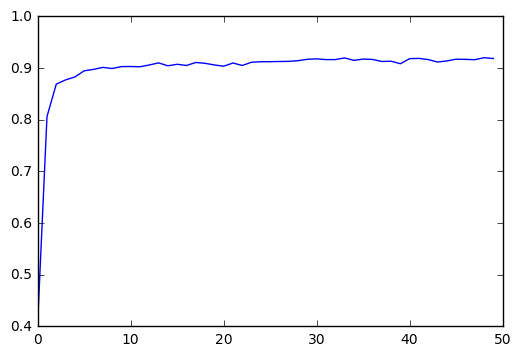

In [116]:
plt.plot(accur_list)
plt.show()

In [161]:
def weight_var(shape):
    init = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init)
def bias_var(shape):
    init = tf.constant(0.1, shape=shape)
    return tf.Variable(init)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')





print (b_conv1.get_shape())

(1, 32)


In [169]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

In [170]:
x_image = tf.reshape(x, [-1, 28, 28, 1]) #[batch_n, in_h, in_w, in_channels]

W_conv1 = weight_var([5, 5, 1, 32]) #[filter_h, filter_w, in_channels, out_channels]
b_conv1 = bias_var([1, 32])            #[out_channels]
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1))
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_var([5, 5, 32, 64])
b_conv2 = bias_var([1, 64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2))
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_var([7*7*64, 1024])
b_fc1 = bias_var([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_var([1024, 10])
b_fc2 = bias_var([10])
h_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

print (h_conv1.get_shape())
print (h_pool1.get_shape())
print (h_conv2.get_shape())
print (h_pool2.get_shape())
print (h_fc1.get_shape())
print (h_fc1_drop.get_shape())
print (h_conv.get_shape())

(?, 28, 28, 32)
(?, 14, 14, 32)
(?, 14, 14, 64)
(?, 7, 7, 64)
(?, 1024)
(?, 1024)
(?, 10)


In [171]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(h_conv, y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
accur = tf.equal(tf.argmax(h_conv, 1), tf.argmax(y, 1))
accur = tf.reduce_mean(tf.cast(accur, tf.float32))

In [174]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

accur_list = []
minibatch_size = 100
report_freq = 20
n_epochs = 1000
for ii in range(n_epochs):
    batch = mnist_data.train.next_batch(minibatch_size)
    sess.run(train_step, feed_dict={x: batch[0], y: batch[1], keep_prob: 1.}) ## remember 'keep_prob'
    if ii % report_freq == 0:
        accuracy = sess.run(accur, feed_dict={x: mnist_data.test.images, y: mnist_data.test.labels, keep_prob: 1.})
        accur_list.append(accuracy)

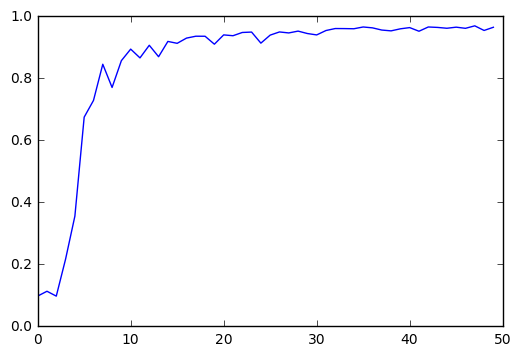

In [175]:
plt.plot(accur_list)
plt.show()